# Wine quality

#### 1. Importare il dataset winequality-white_modified, indicare la dimensione del dataset e valutare se il dataset è bilanciato rispetto la variabile qualità da predire. Prendere confidenza del dataset calcolando misure descrittive dello stesso e facendo dei plot.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("winequality-white_modified.csv", sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.30,0.23,4.6,0.061,50.5,238.5,0.9958,3.32,0.60,9.5,0
1,6.0,0.27,0.28,4.8,0.063,31.0,201.0,0.9964,3.69,0.71,10.0,0
2,7.4,0.24,0.29,10.1,0.050,21.0,105.0,0.9962,3.13,0.35,9.5,0
3,7.4,0.18,0.30,8.8,0.064,26.0,103.0,0.9961,2.94,0.56,9.3,0
4,6.7,0.54,0.28,5.4,0.060,21.0,105.0,0.9949,3.27,0.37,9.0,0


In [4]:
df.shape

(4498, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4498 entries, 0 to 4497
Data columns (total 12 columns):
fixed acidity           4498 non-null float64
volatile acidity        4498 non-null float64
citric acid             4498 non-null float64
residual sugar          4498 non-null float64
chlorides               4498 non-null float64
free sulfur dioxide     4498 non-null float64
total sulfur dioxide    4498 non-null float64
density                 4498 non-null float64
pH                      4498 non-null float64
sulphates               4498 non-null float64
alcohol                 4498 non-null float64
quality                 4498 non-null int64
dtypes: float64(11), int64(1)
memory usage: 421.8 KB


fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

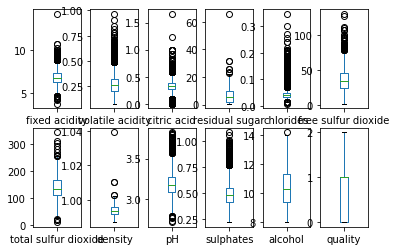

In [6]:
df.plot(kind='box', subplots=True, layout=(2,6))   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56273ec050>,
      dtype=object)

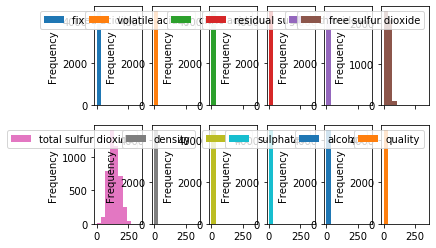

In [7]:
df.plot(kind='hist', subplots=True, layout=(2,6))   

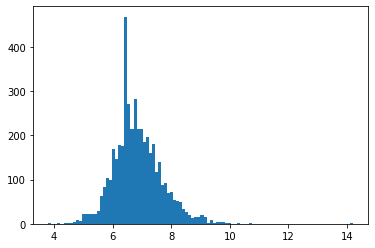

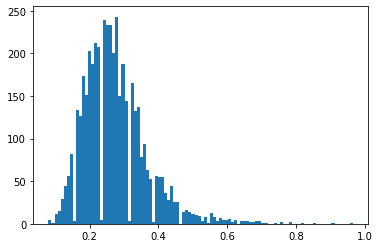

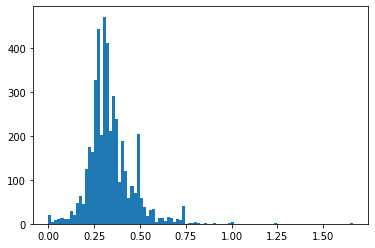

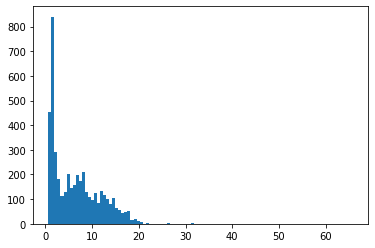

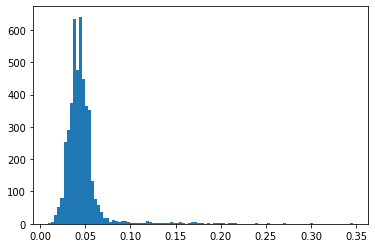

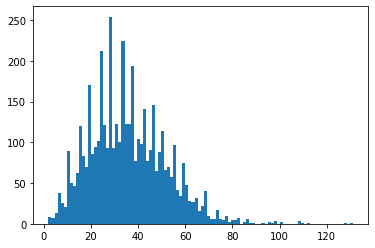

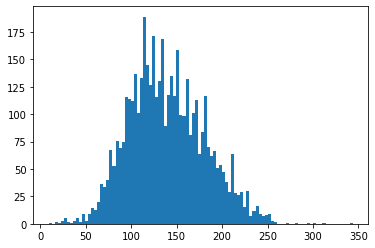

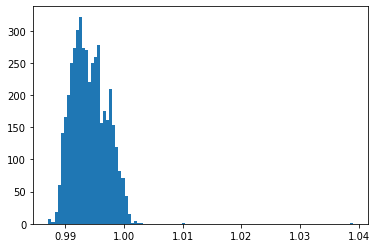

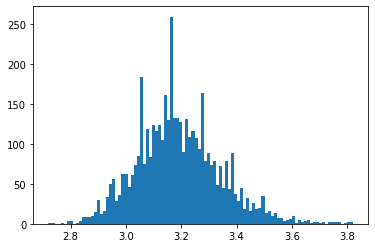

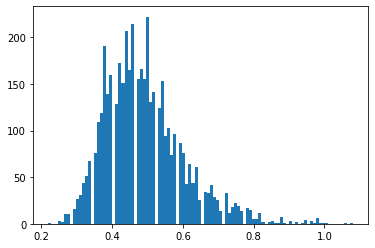

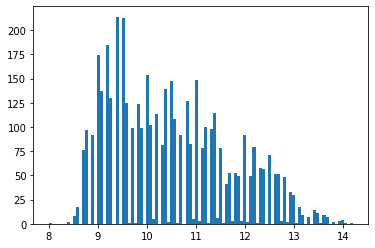

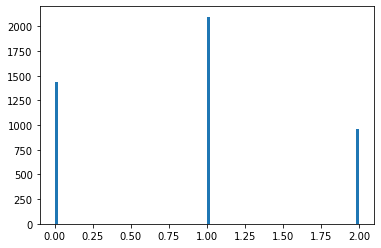

In [8]:
for i in df.columns:
    plt.figure()
    plt.hist(df[i], bins=100)

In [9]:
df.groupby(["quality"]).size()

quality
0    1440
1    2098
2     960
dtype: int64

#### 2. Selezionare il modello KNN e valutare un dataset rispetto a un training che si compone di 2/3 delle istanze. Comparare i risultati di accuratezza ottenuti con un 10 cross fold validation. Comparare con uno stimatore dummy con strategia stratified. Visualizzare la confusion matrix per vedere se l’errore è localizzato in una classe particolare

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
model = KNeighborsClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [ ]:
accuracy_score(y_test,prediction)

In [ ]:
confusion_matrix(y_test,prediction)

In [ ]:
results = cross_val_score(model, X, y, cv=10)

In [ ]:
results

In [ ]:
results.mean()

In [ ]:
dummy_model = DummyClassifier(strategy='most_frequent', random_state=0)

In [ ]:
dummy_model.fit(X_train,y_train)
dummy_prediction = dummy_model.predict(X_test)

In [ ]:
accuracy_score(y_test,dummy_prediction)

In [ ]:
confusion_matrix(y_test,dummy_prediction)

#### 3. Scalare tutte le variabili in modo che siano in un intervallo 0-1 e normalizzare usando la funzione normalizer. Verificare se il nuovo setting migliora i risultati, rispetto il train/test split precedente.

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
min_max_scaler.fit(X)

In [ ]:
X_min_max_scaled= min_max_scaler.transform(X)

In [ ]:
normalizer = preprocessing.Normalizer()

In [ ]:
normalizer.fit(X_min_max_scaled)

In [ ]:
X_normalized= normalizer.transform(X_min_max_scaled)

In [ ]:
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(X_normalized, y)

In [ ]:
model_scaled = KNeighborsClassifier()

In [ ]:
model_scaled.fit(X_train_normalized,y_train_normalized)
prediction = model_scaled.predict(X_test_normalized)

In [ ]:
accuracy_score(y_test_normalized,prediction)

#### 4. Provare alcune configurazioni di numero di neighbors e di weights per cercare di migliorare i risultati


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'weights':('uniform', 'distance'), 'n_neighbors':[1,5,10,50]}

In [ ]:
clf = GridSearchCV(model, parameters, cv=5)
clf.fit(X_train_normalized, y_train_normalized)

In [ ]:
clf.best_estimator_

In [ ]:
clf.best_score_

In [ ]:
parameters = {'weights':('uniform', 'distance'), 'n_neighbors':[50,75,100,150]}

In [ ]:
clf = GridSearchCV(model, parameters, cv=5)
clf.fit(X_train_normalized, y_train_normalized)

In [ ]:
clf.best_estimator_

In [ ]:
parameters = {'weights':('uniform', 'distance'), 'n_neighbors':[40,45,50,55,60]}

In [ ]:
clf = GridSearchCV(model, parameters, cv=5)
clf.fit(X_train_normalized, y_train_normalized)

In [ ]:
clf.best_estimator_

In [ ]:
clf.best_score_

#### 4. Provare il modello ottenuto sul file winequality-white_modified_production e valutare i risultati ottenuti


In [ ]:
test_production= pd.read_csv("winequality-white_modified_production.csv", sep=';')

In [ ]:
X_test_production= test_production.iloc[:,:-1]
y_test_production= test_production.iloc[:,-1]

In [ ]:
#primo modello non ottimizzato
pred_test_production = model.predict(X_test_production)

In [ ]:
accuracy_score(pred_test_production,y_test_production)

In [ ]:
confusion_matrix(pred_test_production,y_test_production)

In [ ]:
#modello ottimizzato

In [ ]:
X_test_production_min_max_scaled= min_max_scaler.transform(X_test_production)

In [ ]:
X_test_production_normalized= normalizer.transform(X_test_production_min_max_scaled)

In [ ]:
modelopt = clf.best_estimator_

In [ ]:
modelopt

In [ ]:
modelopt.fit(X_train_normalized, y_train_normalized)

In [ ]:
prod_prediction = modelopt.predict(X_test_production_normalized)

In [ ]:
accuracy_score(prod_prediction,y_test_production)

In [ ]:
confusion_matrix(prod_prediction,y_test_production)